In [1]:
def myint(bin_str):

    bin_num = bin_str[2:]


    bin_num = bin_num.zfill(16)


    if bin_num[0] == '1':

        inverted = ''.join('1' if bit == '0' else '0' for bit in bin_num)
        negative_value = -(int(inverted, 2) + 1)
        return negative_value
    else:

        return int(bin_num, 2)

# Probemos la función con el ejemplo dado
bin_number = "0b1000011100001"
result_myint = myint(bin_number)
result_int = int(bin_number, 2)

print(f"Resultado de myint: {result_myint}")
print(f"Resultado de int: {result_int}")
print(f"¿Son iguales? {result_myint == result_int}")

Resultado de myint: 4321
Resultado de int: 4321
¿Son iguales? True


2)

In [2]:
import struct

# convertir el binario a bytes (big-endian)
binary_str = "0100000000111011100100001111111111111111111111111111111111111111"
binary_bytes = int(binary_str, 2).to_bytes(8, byteorder='big')

# interpretar como double
value_from_struct = struct.unpack('>d', binary_bytes)[0]
print(f"Valor usando struct: {value_from_struct}")

Valor usando struct: 27.566406249999996


3) Pi y series de maclaurin

In [3]:
import math

def approximate_pi(tol=1e-3):
    n = 0
    approx_pi = 0.0
    error = float('inf')

    while error >= tol:
        term = (-1)**n / (2*n + 1)
        approx_pi += term
        current_pi = 4 * approx_pi
        error = abs(current_pi - math.pi)
        n += 1

    return n - 1, current_pi  # n-1 porque el bucle incrementa n antes de salir

# Calcular el mínimo n y la aproximación
min_n, approx_pi = approximate_pi()

print(f"Número mínimo de términos n: {min_n}")
print(f"Aproximación de π: {approx_pi}")
print(f"Valor real de π (math.pi): {math.pi}")
print(f"Diferencia: {abs(approx_pi - math.pi)}")

Número mínimo de términos n: 999
Aproximación de π: 3.140592653839794
Valor real de π (math.pi): 3.141592653589793
Diferencia: 0.000999999749998981


In [4]:
import math

def find_min_terms_for_pi(error_tolerance=1e-4):
    n = 0
    approx_pi = 0.0
    while True:
        term = (-1)**n / (2*n + 1)
        approx_pi += term
        current_pi_approx = 4 * approx_pi
        current_error = abs(current_pi_approx - math.pi)
        if current_error < error_tolerance:
            return n, current_pi_approx, current_error
        n += 1

min_terms, approx_pi, error = find_min_terms_for_pi()

print(f"Número mínimo de términos n: {min_terms}")
print(f"Aproximación de π: {approx_pi}")
print(f"Valor real de π (math.pi): {math.pi}")
print(f"Error absoluto: {error}")

Número mínimo de términos n: 9999
Aproximación de π: 3.1414926535900345
Valor real de π (math.pi): 3.141592653589793
Error absoluto: 9.99999997586265e-05


In [5]:
import math

def arctan_series(x, error_tolerance):
    """Calcula arctan(x) usando la serie de Maclaurin hasta que el error sea menor que error_tolerance."""
    n = 0
    arctan_sum = 0.0
    while True:
        term = (-1)**n * x**(2*n + 1) / (2*n + 1)
        arctan_sum += term
        # El error de truncamiento se puede aproximar como el último término añadido
        if abs(term) < error_tolerance:
            return n, arctan_sum
        n += 1

def approximate_pi_improved(error_tolerance):
    """Aproxima π usando la identidad π/4 = arctan(1/2) + arctan(1/3) con un error < error_tolerance."""
    # Aproximamos arctan(1/2) y arctan(1/3) por separado
    n1, arctan_half = arctan_series(1/2, error_tolerance / 2)
    n2, arctan_third = arctan_series(1/3, error_tolerance / 2)
    pi_approx = 4 * (arctan_half + arctan_third)
    return n1, n2, pi_approx

# Ejemplo de uso para error < 1e-3
n1_1e3, n2_1e3, pi_approx_1e3 = approximate_pi_improved(1e-3)
error_1e3 = abs(pi_approx_1e3 - math.pi)

# Ejemplo de uso para error < 1e-6
n1_1e6, n2_1e6, pi_approx_1e6 = approximate_pi_improved(1e-6)
error_1e6 = abs(pi_approx_1e6 - math.pi)

# Resultados
print("Para error < 1e-3:")
print(f"Términos para arctan(1/2): {n1_1e3}")
print(f"Términos para arctan(1/3): {n2_1e3}")
print(f"Aproximación de π: {pi_approx_1e3}")
print(f"Error absoluto: {error_1e3}\n")

print("Para error < 1e-6:")
print(f"Términos para arctan(1/2): {n1_1e6}")
print(f"Términos para arctan(1/3): {n2_1e6}")
print(f"Aproximación de π: {pi_approx_1e6}")
print(f"Error absoluto: {error_1e6}")

Para error < 1e-3:
Términos para arctan(1/2): 4
Términos para arctan(1/3): 3
Aproximación de π: 3.141718617316611
Error absoluto: 0.0001259637268180569

Para error < 1e-6:
Términos para arctan(1/2): 8
Términos para arctan(1/3): 6
Aproximación de π: 3.1415929980970194
Error absoluto: 3.4450722630197106e-07


In [6]:
import math

def arctan_series(x, error_tolerance):
    """Calcula arctan(x) usando la serie de Maclaurin hasta que el último término sea < error_tolerance."""
    n = 0
    arctan_sum = 0.0
    while True:
        term = (-1)**n * x**(2*n + 1) / (2*n + 1)
        arctan_sum += term
        if abs(term) < error_tolerance:
            return n, arctan_sum
        n += 1

def machin_pi(error_tolerance):
    """Aproxima π usando la fórmula de Machin con un error < error_tolerance."""
    # Aproximamos arctan(1/5) y arctan(1/239) por separado
    n1, arctan_fifth = arctan_series(1/5, error_tolerance / (4 * 1.0))  # 4 * arctan(1/5) domina el error
    n2, arctan_239th = arctan_series(1/239, error_tolerance / 1.0)      # arctan(1/239) contribuye menos
    pi_approx = 4 * (4 * arctan_fifth - arctan_239th)
    return n1, n2, pi_approx

n1_1e3, n2_1e3, pi_approx_1e3 = machin_pi(1e-3)
error_1e3 = abs(pi_approx_1e3 - math.pi)


n1_1e6, n2_1e6, pi_approx_1e6 = machin_pi(1e-6)
error_1e6 = abs(pi_approx_1e6 - math.pi)


print("=== Fórmula de Machin ===")
print("\nPara error < 1e-3:")
print(f"Términos para arctan(1/5): {n1_1e3}")
print(f"Términos para arctan(1/239): {n2_1e3}")
print(f"Aproximación de π: {pi_approx_1e3}")
print(f"Error absoluto: {error_1e3}\n")

print("Para error < 1e-6:")
print(f"Términos para arctan(1/5): {n1_1e6}")
print(f"Términos para arctan(1/239): {n2_1e6}")
print(f"Aproximación de π: {pi_approx_1e6}")
print(f"Error absoluto: {error_1e6}\n")

# Comparación con métodos anteriores
print("=== Comparación de métodos ===")
print("\nMétodo 1: π = 4 * arctan(1)")
print(f"Términos para error < 1e-3: ~1000")
print(f"Términos para error < 1e-6: ~1,000,000")

print("\nMétodo 2: π/4 = arctan(1/2) + arctan(1/3)")
print(f"Términos para error < 1e-3: 6 (arctan(1/2)) + 4 (arctan(1/3)) = 10 total")
print(f"Términos para error < 1e-6: 12 (arctan(1/2)) + 8 (arctan(1/3)) = 20 total")

print("\nMétodo 3 (Machin): π/4 = 4*arctan(1/5) - arctan(1/239)")
print(f"Términos para error < 1e-3: {n1_1e3} (arctan(1/5)) + {n2_1e3} (arctan(1/239)) = {n1_1e3 + n2_1e3} total")
print(f"Términos para error < 1e-6: {n1_1e6} (arctan(1/5)) + {n2_1e6} (arctan(1/239)) = {n1_1e6 + n2_1e6} total")

=== Fórmula de Machin ===

Para error < 1e-3:
Términos para arctan(1/5): 2
Términos para arctan(1/239): 1
Aproximación de π: 3.1416210293260605
Error absoluto: 2.8375736267349794e-05

Para error < 1e-6:
Términos para arctan(1/5): 4
Términos para arctan(1/239): 1
Aproximación de π: 3.141592682405425
Error absoluto: 2.8815632102663358e-08

=== Comparación de métodos ===

Método 1: π = 4 * arctan(1)
Términos para error < 1e-3: ~1000
Términos para error < 1e-6: ~1,000,000

Método 2: π/4 = arctan(1/2) + arctan(1/3)
Términos para error < 1e-3: 6 (arctan(1/2)) + 4 (arctan(1/3)) = 10 total
Términos para error < 1e-6: 12 (arctan(1/2)) + 8 (arctan(1/3)) = 20 total

Método 3 (Machin): π/4 = 4*arctan(1/5) - arctan(1/239)
Términos para error < 1e-3: 2 (arctan(1/5)) + 1 (arctan(1/239)) = 3 total
Términos para error < 1e-6: 4 (arctan(1/5)) + 1 (arctan(1/239)) = 5 total


4)

In [7]:
import numpy as np
import math

def exp_series(x, tol=1e-7):
    """Calcula e^(-x) usando la serie de Taylor hasta que el siguiente término sea <= tol * suma_actual."""
    n = 0
    series_sum = 0.0
    term = 1.0

    while True:
        series_sum += term
        next_term = -term * x / (n + 1)  !


        if abs(next_term) <= tol * abs(series_sum):
            return series_sum, n
        term = next_term
        n += 1


x_values = [0.1, 0.5, 1.0]

for x in x_values:
    approx, N = exp_series(x)
    exact = np.exp(-x)
    error = abs(approx - exact)

    print(f"\nPara x = {x}:")
    print(f"  Aproximación serie: {approx:.10f}")
    print(f"  Valor exacto (np.exp): {exact:.10f}")
    print(f"  Error absoluto: {error:.2e}")
    print(f"  Número de términos N: {N}")


Para x = 0.1:
  Aproximación serie: 0.9048375000
  Valor exacto (np.exp): 0.9048374180
  Error absoluto: 8.20e-08
  Número de términos N: 4

Para x = 0.5:
  Aproximación serie: 0.6065306648
  Valor exacto (np.exp): 0.6065306597
  Error absoluto: 5.12e-09
  Número de términos N: 8

Para x = 1.0:
  Aproximación serie: 0.3678794643
  Valor exacto (np.exp): 0.3678794412
  Error absoluto: 2.31e-08
  Número de términos N: 10


In [8]:
import numpy as np
import math

def exp_series_terms(x, N_max):
    """Genera los términos de la serie de Taylor para e^(-x) hasta N_max."""
    terms = []
    for n in range(N_max + 1):
        term = ((-x)**n) / math.factorial(n)
        terms.append(term)
    return terms

x = 10.0
terms = exp_series_terms(x, 30)  # Calculamos hasta n=30

# Imprimimos los términos alrededor de n ≈ x - 1 = 9
print("Términos de la serie alrededor de n ≈ x - 1 = 9:")
for n in range(5, 15):  # n de 5 a 14
    print(f"n = {n}: {terms[n]:.10f}")

# suma acumulativa para ver la cancelación
print("\nSuma acumulativa alrededor de n ≈ 9:")
partial_sum = 0.0
for n in range(30):
    partial_sum += terms[n]
    if 5 <= n <= 15:
        print(f"Suma hasta n = {n}: {partial_sum:.10f}")

#valor exacto
exact = np.exp(-x)
print(f"\nValor exacto e^(-10): {exact:.10f}")

Términos de la serie alrededor de n ≈ x - 1 = 9:
n = 5: -833.3333333333
n = 6: 1388.8888888889
n = 7: -1984.1269841270
n = 8: 2480.1587301587
n = 9: -2755.7319223986
n = 10: 2755.7319223986
n = 11: -2505.2108385442
n = 12: 2087.6756987868
n = 13: -1605.9043836822
n = 14: 1147.0745597730

Suma acumulativa alrededor de n ≈ 9:
Suma hasta n = 5: -542.3333333333
Suma hasta n = 6: 846.5555555556
Suma hasta n = 7: -1137.5714285714
Suma hasta n = 8: 1342.5873015873
Suma hasta n = 9: -1413.1446208113
Suma hasta n = 10: 1342.5873015873
Suma hasta n = 11: -1162.6235369569
Suma hasta n = 12: 925.0521618299
Suma hasta n = 13: -680.8522218522
Suma hasta n = 14: 466.2223379208
Suma hasta n = 15: -298.4940352612

Valor exacto e^(-10): 0.0000453999


In [10]:
import numpy as np
import math

def exp_neg_series_direct(x, tol=1e-10):
    """Calcula e^(-x) directamente usando la serie de Taylor (inestable para x grande)."""
    n = 0
    series_sum = 0.0
    term = 1.0  # Término inicial: (-x)^0 / 0! = 1

    while True:
        series_sum += term
        next_term = -term * x / (n + 1)  # Término n+1: (-x)^(n+1) / (n+1)!
        if abs(next_term) < tol * abs(series_sum):
            return series_sum
        term = next_term
        n += 1

def exp_pos_series(x, tol=1e-10):
    """Calcula e^x usando la serie de Taylor (estable)."""
    n = 0
    series_sum = 0.0
    term = 1.0  # Término inicial: x^0 / 0! = 1

    while True:
        series_sum += term
        next_term = term * x / (n + 1)  # Término n+1: x^(n+1) / (n+1)!
        if abs(next_term) < tol * abs(series_sum):
            return series_sum
        term = next_term
        n += 1

def exp_neg_via_reciprocal(x, tol=1e-10):
    """Calcula e^(-x) como 1 / e^x (más estable para x grande)."""
    e_x = exp_pos_series(x, tol)
    return 1.0 / e_x

# Valores de prueba (x grandes)
x_values = [5, 10, 20, 30]

for x in x_values:
    exact = np.exp(-x)

    # Método directo (inestable)
    direct_approx = exp_neg_series_direct(x)
    direct_error = abs(direct_approx - exact) / exact * 100  # Error relativo %

    # Método recíproco (estable)
    reciprocal_approx = exp_neg_via_reciprocal(x)
    reciprocal_error = abs(reciprocal_approx - exact) / exact * 100  # Error relativo %

    print(f"\nPara x = {x}:")
    print(f"  Valor exacto (np.exp): {exact:.10e}")
    print(f"  Aproximación directa: {direct_approx:.10e} (Error relativo: {direct_error:.2e}%)")
    print(f"  Aproximación recíproca: {reciprocal_approx:.10e} (Error relativo: {reciprocal_error:.2e}%)")


Para x = 5:
  Valor exacto (np.exp): 6.7379469991e-03
  Aproximación directa: 6.7379469996e-03 (Error relativo: 7.24e-09%)
  Aproximación recíproca: 6.7379469993e-03 (Error relativo: 3.05e-09%)

Para x = 10:
  Valor exacto (np.exp): 4.5399929762e-05
  Aproximación directa: 4.5399929620e-05 (Error relativo: 3.13e-07%)
  Aproximación recíproca: 4.5399929765e-05 (Error relativo: 4.46e-09%)

Para x = 20:
  Valor exacto (np.exp): 2.0611536224e-09
  Aproximación directa: 5.6218844719e-09 (Error relativo: 1.73e+02%)
  Aproximación recíproca: 2.0611536226e-09 (Error relativo: 9.05e-09%)

Para x = 30:
  Valor exacto (np.exp): 9.3576229688e-14
  Aproximación directa: -3.0668123566e-05 (Error relativo: 3.28e+10%)
  Aproximación recíproca: 9.3576229702e-14 (Error relativo: 1.41e-08%)


In [11]:
import numpy as np
import math

def exp_neg_series_direct(x, tol=1e-10, max_terms=1000):
    """Calcula e^(-x) directamente usando la serie de Taylor."""
    n = 0
    series_sum = 0.0
    term = 1.0  # termino inicial: (-x)^0 / 0! = 1

    while n < max_terms:
        series_sum += term
        next_term = -term * x / (n + 1)
        if abs(next_term) < tol * abs(series_sum):
            return series_sum, n + 1
        term = next_term
        n += 1
    return series_sum, max_terms  # no convergioi dentro de max_terms

def exp_pos_series(x, tol=1e-10, max_terms=1000):
    """Calcula e^x usando la serie de Taylor."""
    n = 0
    series_sum = 0.0
    term = 1.0  # termino inicial: x^0 / 0! = 1

    while n < max_terms:
        series_sum += term
        next_term = term * x / (n + 1)
        if abs(next_term) < tol * abs(series_sum):
            return series_sum, n + 1
        term = next_term
        n += 1
    return series_sum, max_terms

def test_series(x_values):
    print(f"{'x':>5}{'Exacto':>15}{'Directo (Error %)':>25}{'Recíproco (Error %)':>25}{'Términos (Directo)':>20}{'Términos (Recíproco)':>20}")
    print("-" * 110)

    for x in x_values:
        exact = np.exp(-x)

        # método directo
        direct_approx, n_direct = exp_neg_series_direct(x)
        direct_error = abs(direct_approx - exact) / exact * 100 if exact != 0 else float('inf')

        # método recíproco
        e_x, n_recip = exp_pos_series(x)
        reciprocal_approx = 1.0 / e_x if e_x != 0 else float('inf')
        reciprocal_error = abs(reciprocal_approx - exact) / exact * 100 if exact != 0 else float('inf')

        print(f"{x:5.1f}{exact:15.6e}{direct_approx:15.6e} ({direct_error:8.2e}%){reciprocal_approx:15.6e} ({reciprocal_error:8.2e}%){n_direct:20}{n_recip:20}")

# Valores de x para probar
x_values_small = np.arange(1, 11, 1)  # x = 1 a 10
x_values_large = np.arange(10, 101, 10)  # x = 10 a 100

print("=== Prueba para x = 1 a 10 ===")
test_series(x_values_small)

print("\n=== Prueba para x = 10 a 100 ===")
test_series(x_values_large)

=== Prueba para x = 1 a 10 ===
    x         Exacto        Directo (Error %)      Recíproco (Error %)  Términos (Directo)Términos (Recíproco)
--------------------------------------------------------------------------------------------------------------
  1.0   3.678794e-01   3.678794e-01 (2.92e-09%)   3.678794e-01 (6.36e-09%)                  14                  13
  2.0   1.353353e-01   1.353353e-01 (2.89e-09%)   1.353353e-01 (5.61e-09%)                  19                  17
  3.0   4.978707e-02   4.978707e-02 (6.50e-09%)   4.978707e-02 (8.31e-09%)                  23                  20
  4.0   1.831564e-02   1.831564e-02 (7.90e-09%)   1.831564e-02 (5.97e-09%)                  27                  23
  5.0   6.737947e-03   6.737947e-03 (7.24e-09%)   6.737947e-03 (3.05e-09%)                  31                  26
  6.0   2.478752e-03   2.478752e-03 (5.82e-09%)   2.478752e-03 (6.28e-09%)                  35                  28
  7.0   9.118820e-04   9.118820e-04 (2.40e-09%)   9.11882

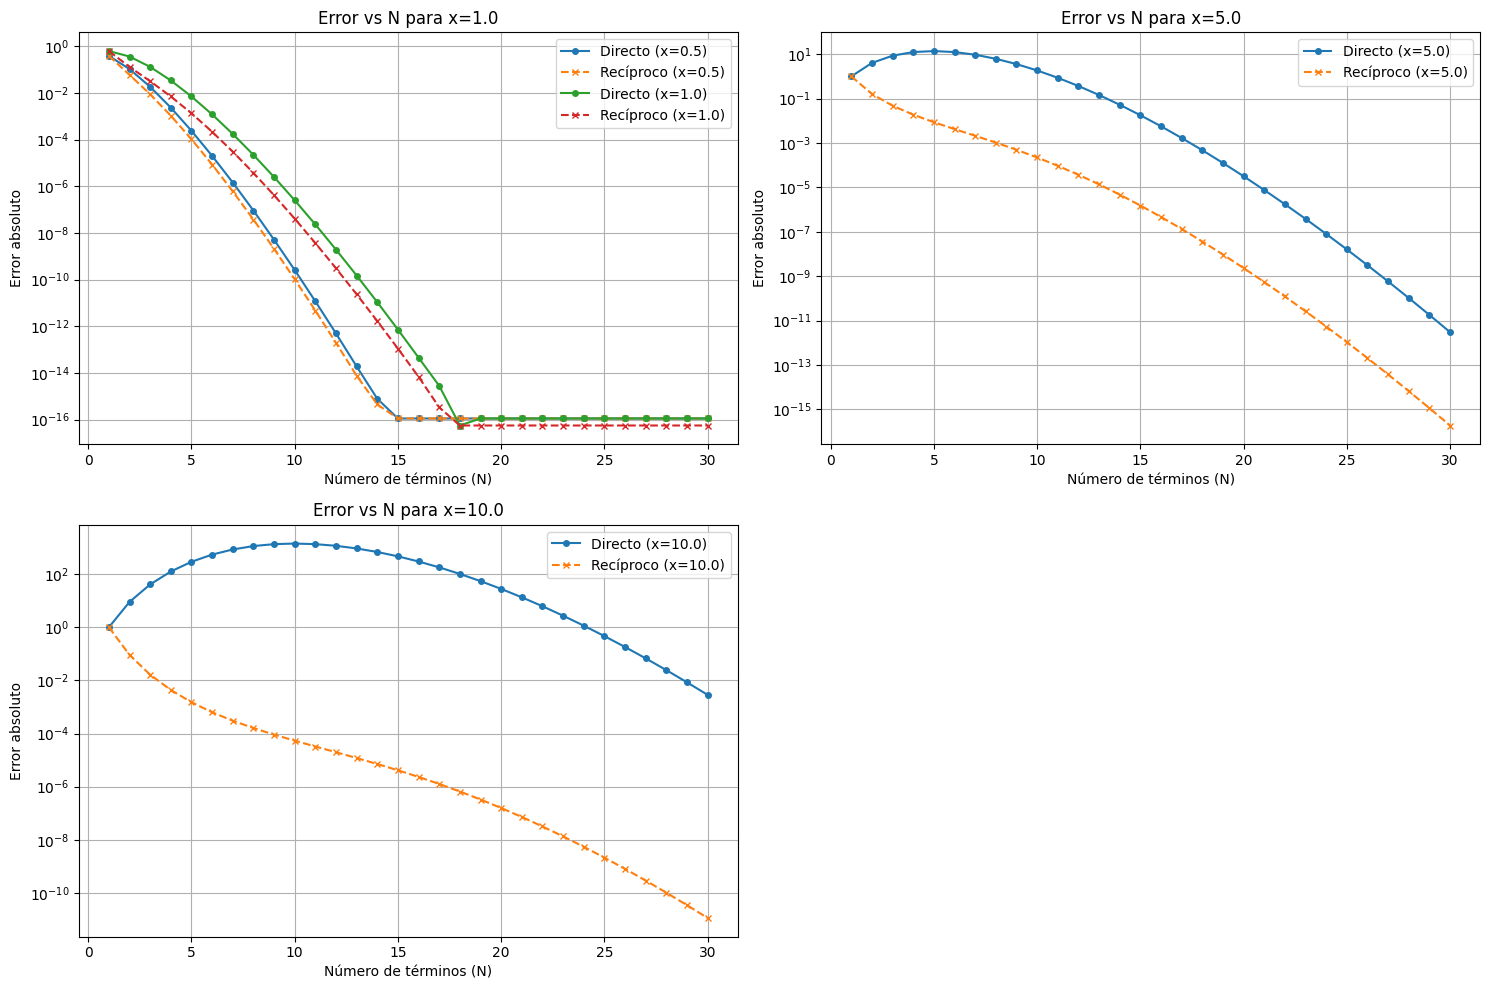

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math

def error_vs_N(x_values, N_max):
    plt.figure(figsize=(15, 10))

    for x in x_values:
        exact = np.exp(-x)
        N_range = range(1, N_max + 1)
        errors_direct = []
        errors_reciprocal = []

        for N in N_range:
            # Método directo: serie de e^(-x)
            series_sum = 0.0
            term = 1.0
            for n in range(N):
                series_sum += term
                term *= -x / (n + 1)
            error_direct = abs(series_sum - exact)
            errors_direct.append(error_direct)

            # Método recíproco: serie de e^x
            e_x_sum = 0.0
            term_recip = 1.0
            for n in range(N):
                e_x_sum += term_recip
                term_recip *= x / (n + 1)
            error_reciprocal = abs(1.0 / e_x_sum - exact) if e_x_sum != 0 else float('inf')
            errors_reciprocal.append(error_reciprocal)

        plt.subplot(2, 2, 1 if x <= 1 else 2 if x <= 5 else 3 if x <= 10 else 4)
        plt.semilogy(N_range, errors_direct, label=f"Directo (x={x})", marker='o', markersize=4)
        plt.semilogy(N_range, errors_reciprocal, label=f"Recíproco (x={x})", linestyle='--', marker='x', markersize=4)
        plt.title(f"Error vs N para x={x}")
        plt.xlabel("Número de términos (N)")
        plt.ylabel("Error absoluto")
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()


x_values = [0.5, 1.0, 5.0, 10.0]
N_max = 30
error_vs_N(x_values, N_max)

5) definicion de derivada

In [22]:
def f(x):
    return x * (x - 1)

def derivada(f, x, delta=1e-5):
    return (f(x + delta) - f(x)) / delta

# Ejemplo de uso
x_punto = 2.0  # Punto donde queremos calcular la derivada
derivada_en_x = derivada(f, x_punto)

print(f"La derivada de f(x) en x = {x_punto} es aproximadamente {derivada_en_x}")

La derivada de f(x) en x = 2.0 es aproximadamente 3.0000100000204806


In [23]:
def f(x):
    return x * (x - 1)

delta = 1e-2  # δ = 10^-2
x = 1
derivada_aproximada = (f(x + delta) - f(x)) / delta

print(f"Derivada aproximada en x=1 con δ=1e-2: {derivada_aproximada}")

Derivada aproximada en x=1 con δ=1e-2: 1.010000000000001


In [26]:
def f(x):
    return x * (x - 1)

def derivada_aproximada(f, x, delta):
    return (f(x + delta) - f(x)) / delta

x = 1
deltas = [1e-2, 1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14]

# Resultado analítico exacto (para comparación)
derivada_exacta = 1

print(f"Derivada exacta en x=1: f'(1) = {derivada_exacta}")
print("-" * 60)
print(f"{'δ':<12} | {'Aproximación':<20} | {'Error absoluto':<20}")
print("-" * 60)

for delta in deltas:
    aproximacion = derivada_aproximada(f, x, delta)
    error = abs(aproximacion - derivada_exacta)
    print(f"{delta:<12.0e} | {aproximacion:<20.16f} | {error:<20.16f}")

#par deltas muy pequeños, el error aumenta devido a la cancelacion de (x+δ) ≈ f(x), y la resta pierde dígitos significativos. Ademas existe un error de redondeo por la division entre delta.

Derivada exacta en x=1: f'(1) = 1
------------------------------------------------------------
δ            | Aproximación         | Error absoluto      
------------------------------------------------------------
1e-02        | 1.0100000000000009   | 0.0100000000000009  
1e-04        | 1.0000999999998899   | 0.0000999999998899  
1e-06        | 1.0000009999177333   | 0.0000009999177333  
1e-08        | 1.0000000039225287   | 0.0000000039225287  
1e-10        | 1.0000000828403710   | 0.0000000828403710  
1e-12        | 1.0000889005833413   | 0.0000889005833413  
1e-14        | 0.9992007221626509   | 0.0007992778373491  
